In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics

## **Preliminary Analysis**

In [22]:
data = pd.read_csv("/content/Weather Test Data.csv")
print(data.shape)
data.head()

(42677, 22)


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42483 non-null  float64
 3   MaxTemp        42585 non-null  float64
 4   Rainfall       42250 non-null  float64
 5   Evaporation    24365 non-null  float64
 6   Sunshine       22178 non-null  float64
 7   WindGustDir    39868 non-null  object 
 8   WindGustSpeed  39887 non-null  float64
 9   WindDir9am     39670 non-null  object 
 10  WindDir3pm     41547 non-null  object 
 11  WindSpeed9am   42264 non-null  float64
 12  WindSpeed3pm   41882 non-null  float64
 13  Humidity9am    42136 non-null  float64
 14  Humidity3pm    41573 non-null  float64
 15  Pressure9am    38411 non-null  float64
 16  Pressure3pm    38432 non-null  float64
 17  Cloud9am       26592 non-null  float64
 18  Cloud3

In [24]:
print(data.isnull().sum())

row ID               0
Location             0
MinTemp            194
MaxTemp             92
Rainfall           427
Evaporation      18312
Sunshine         20499
WindGustDir       2809
WindGustSpeed     2790
WindDir9am        3007
WindDir3pm        1130
WindSpeed9am       413
WindSpeed3pm       795
Humidity9am        541
Humidity3pm       1104
Pressure9am       4266
Pressure3pm       4245
Cloud9am         16085
Cloud3pm         17092
Temp9am            290
Temp3pm            822
RainToday          427
dtype: int64


## **Data Cleansing**

In [107]:
updated_data = data
updated_data = updated_data.drop(['row ID'], axis = 1)
updated_data['MinTemp']=updated_data['MinTemp'].fillna(updated_data['MinTemp'].mean())
updated_data['MaxTemp']=updated_data['MaxTemp'].fillna(updated_data['MaxTemp'].mean())
updated_data['Rainfall']=updated_data['Rainfall'].fillna(updated_data['Rainfall'].mean())
updated_data['Evaporation']=updated_data['Evaporation'].fillna(updated_data['Evaporation'].mean())
updated_data['Sunshine']=updated_data['Sunshine'].fillna(updated_data['Sunshine'].mean())
updated_data['WindGustSpeed']=updated_data['WindGustSpeed'].fillna(updated_data['WindGustSpeed'].mean())
updated_data['WindSpeed9am']=updated_data['WindSpeed9am'].fillna(updated_data['WindSpeed9am'].mean())
updated_data['WindSpeed3pm']=updated_data['WindSpeed3pm'].fillna(updated_data['WindSpeed3pm'].mean())
updated_data['Humidity9am']=updated_data['Humidity9am'].fillna(updated_data['Humidity9am'].mean())
updated_data['Humidity3pm']=updated_data['Humidity3pm'].fillna(updated_data['Humidity3pm'].mean())
updated_data['Pressure9am']=updated_data['Pressure9am'].fillna(updated_data['Pressure9am'].mean())
updated_data['Pressure3pm']=updated_data['Pressure3pm'].fillna(updated_data['Pressure3pm'].mean())
updated_data['Cloud9am']=updated_data['Cloud9am'].fillna(abs(updated_data['Cloud9am'].mode()))
updated_data['Cloud3pm']=updated_data['Cloud3pm'].fillna(abs(updated_data['Cloud3pm'].mode()))
updated_data['Temp9am']=updated_data['Temp9am'].fillna(updated_data['Temp9am'].mean())
updated_data['Temp3pm']=updated_data['Temp3pm'].fillna(updated_data['Temp3pm'].mean())
updated_data['WindGustDir']=updated_data['WindGustDir'].fillna(updated_data['WindGustDir'].value_counts().idxmax())
updated_data['WindDir9am']=updated_data['WindDir9am'].fillna(updated_data['WindDir9am'].value_counts().idxmax())
updated_data['WindDir3pm']=updated_data['WindDir3pm'].fillna(updated_data['WindDir3pm'].value_counts().idxmax())
updated_data=updated_data.dropna()
print(updated_data.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64


In [109]:
updated_data.loc[updated_data.RainToday == "Yes", "RainToday"] = 1
updated_data.loc[updated_data.RainToday == "No", "RainToday"] = 0
updated_data['RainToday'] = updated_data['RainToday'].astype(bool)
updated_data['RainToday'] = updated_data['Cloud9am'].astype(int)
updated_data['RainToday'] = updated_data['Cloud3pm'].astype(int)
updated_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,12.9,25.7,0.0,5.489715,7.647831,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,2
4,Albury,15.9,18.6,15.6,5.489715,7.647831,W,61.0,NNW,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,8
16,Albury,24.4,34.0,0.6,5.489715,7.647831,NW,98.0,N,NNW,...,48.0,60.0,39.0,1005.3,997.8,4.0,1.0,26.1,33.1,1
22,Albury,18.4,31.2,0.4,5.489715,7.647831,SE,37.0,SW,WSW,...,11.0,66.0,31.0,1009.3,1007.8,7.0,8.0,18.7,29.4,8
23,Albury,16.1,21.6,0.0,5.489715,7.647831,SE,46.0,SSE,NE,...,15.0,58.0,69.0,1017.0,1017.3,2.0,8.0,17.0,17.3,8


## **Exploratory Data Analysis**

In [27]:
updated_data['Location'].value_counts()

Canberra            1022
Darwin               975
Sydney               973
Albany               958
Launceston           954
Brisbane             954
Hobart               945
Woomera              937
Perth                931
Townsville           926
Bendigo              923
SalmonGums           919
NorfolkIsland        919
AliceSprings         911
GoldCoast            905
Sale                 905
SydneyAirport        904
Ballarat             901
WaggaWagga           900
Adelaide             898
Cobar                893
Nuriootpa            890
Tuggeranong          889
MountGambier         888
NorahHead            886
Watsonia             884
Mildura              883
CoffsHarbour         883
Wollongong           882
Penrith              882
Witchcliffe          881
Cairns               879
Portland             877
Richmond             876
Dartmoor             876
BadgerysCreek        876
MelbourneAirport     870
Albury               861
MountGinini          854
Newcastle            848


In [117]:
updated_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000,24282.000000
mean,13.048875,23.590909,2.630603,5.519942,7.660051,40.634816,14.898061,19.268698,68.027241,51.804200,1017.272208,1014.900897,4.415699,4.473314,17.636421,22.084388,4.473314
std,6.424600,7.042607,9.398156,3.832735,3.354375,12.967019,8.759980,8.808878,18.780601,20.853599,6.868936,6.819850,2.877164,2.723274,6.546831,6.915167,2.723274
min,-6.300000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,982.200000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000
25%,8.200000,18.100000,0.000000,3.200000,6.100000,31.000000,9.000000,13.000000,57.000000,37.000000,1012.800000,1010.300000,1.000000,2.000000,12.600000,16.800000,2.000000
50%,12.800000,23.100000,0.000000,5.489715,7.647831,39.000000,13.000000,19.000000,69.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,17.300000,21.500000,5.000000
75%,17.900000,28.900000,1.000000,7.000000,10.200000,48.000000,20.000000,24.000000,82.000000,66.000000,1021.800000,1019.400000,7.000000,7.000000,22.500000,27.100000,7.000000
max,29.700000,46.800000,278.400000,145.000000,14.300000,122.000000,74.000000,83.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,8.000000,39.400000,45.400000,8.000000


In [118]:
row,cols=updated_data.shape
print("Number of Attributes =",cols)
print("Number of Samples =",row)

Number of Attributes = 21
Number of Samples = 24282


In [119]:
updated_data.size

509922

In [120]:
pd.DataFrame(updated_data)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,12.9,25.7,0.0,5.489715,7.647831,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,2
4,Albury,15.9,18.6,15.6,5.489715,7.647831,W,61.0,NNW,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,8
16,Albury,24.4,34.0,0.6,5.489715,7.647831,NW,98.0,N,NNW,...,48.0,60.0,39.0,1005.3,997.8,4.0,1.0,26.1,33.1,1
22,Albury,18.4,31.2,0.4,5.489715,7.647831,SE,37.0,SW,WSW,...,11.0,66.0,31.0,1009.3,1007.8,7.0,8.0,18.7,29.4,8
23,Albury,16.1,21.6,0.0,5.489715,7.647831,SE,46.0,SSE,NE,...,15.0,58.0,69.0,1017.0,1017.3,2.0,8.0,17.0,17.3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42656,Uluru,15.6,27.3,0.0,5.489715,7.647831,SSE,41.0,SE,SSE,...,15.0,77.0,45.0,1018.0,1014.9,8.0,4.0,19.3,26.4,4
42667,Uluru,14.6,26.3,0.0,5.489715,7.647831,S,37.0,SSW,S,...,20.0,61.0,36.0,1022.0,1018.6,7.0,1.0,15.4,25.0,1
42668,Uluru,14.3,27.6,0.4,5.489715,7.647831,WNW,39.0,N,NW,...,20.0,68.0,27.0,1020.5,1016.1,4.0,7.0,16.1,27.2,7
42670,Uluru,12.7,22.2,0.0,5.489715,7.647831,E,37.0,E,ESE,...,13.0,59.0,34.0,1024.3,1021.7,8.0,8.0,13.9,21.0,8


In [114]:
mintem=np.array(updated_data['MinTemp'])
print("Highest Minimum Temerature                =",mintem.max())
print("Lowest Minimum Temerature                 =",mintem.min())
print("Average Minimum temperature               =",np.mean(mintem))
print("Most occuring minimum temperature         =",statistics.mode(mintem))

Highest Minimum Temerature                = 29.7
Lowest Minimum Temerature                 = -6.3
Average Minimum temperature               = 13.048875350369801
Most occuring minimum temperature         = 14.8


In [115]:
maxtem=np.array(updated_data['MaxTemp'])
print("Highest Minimum Temerature                =",maxtem.max())
print("Lowest Minimum Temerature                 =",maxtem.min())
print("Average Minimum temperature               =",np.mean(maxtem))
print("Most occuring minimum temperature         =",statistics.mode(maxtem))

Highest Minimum Temerature                = 46.8
Lowest Minimum Temerature                 = 4.1
Average Minimum temperature               = 23.590908973585652
Most occuring minimum temperature         = 18.2


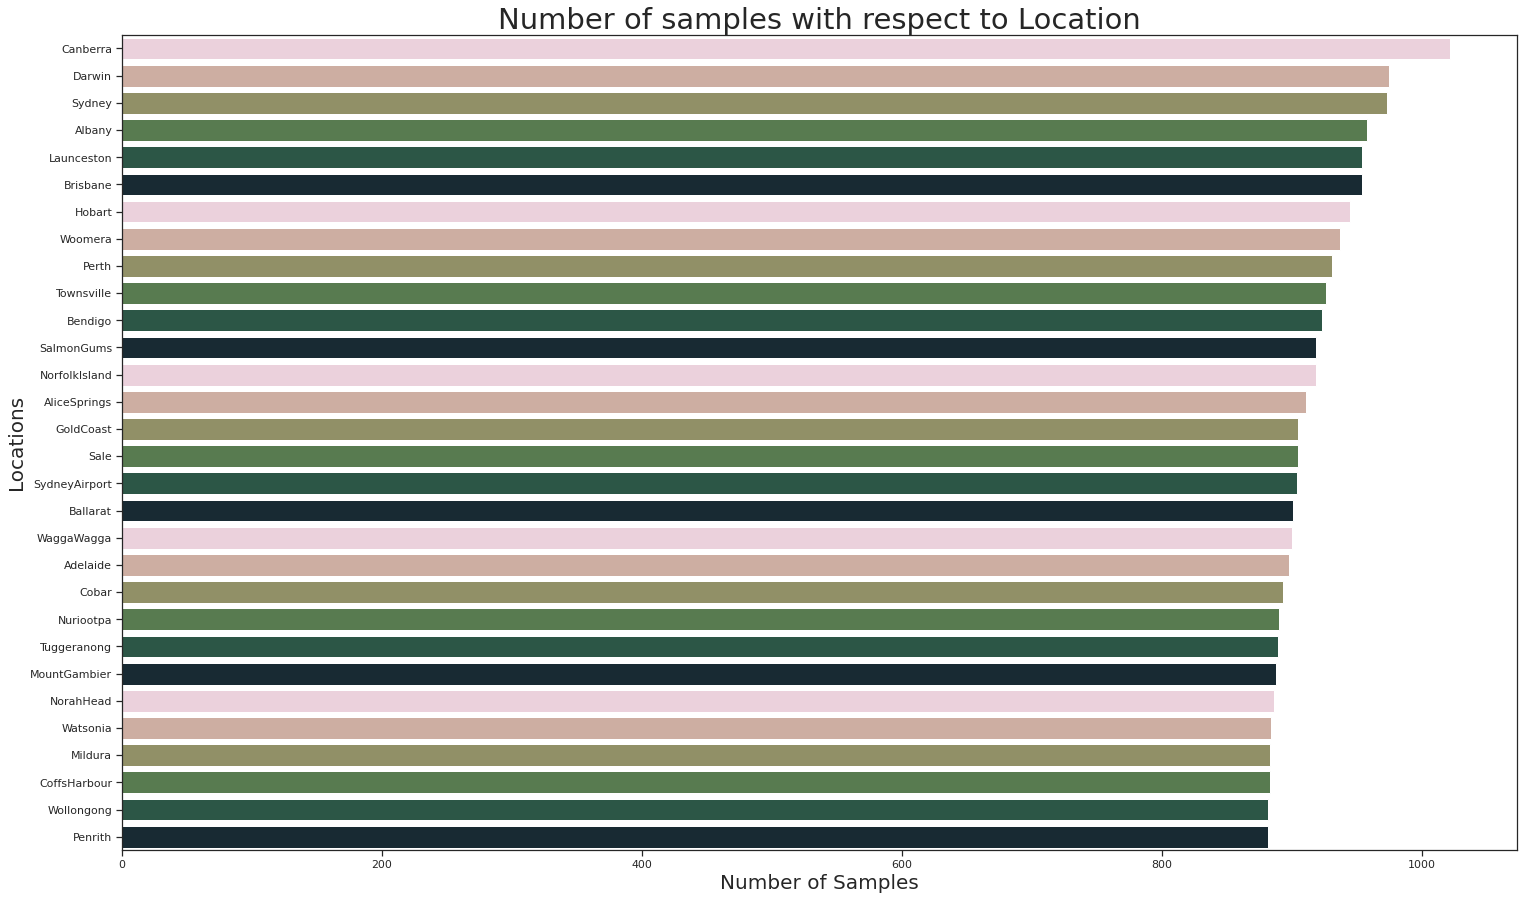

In [41]:
plt.figure(figsize=(25,15))
sns.countplot(y='Location', data=updated_data, order=updated_data['Location'].value_counts().index[:30], palette=sns.cubehelix_palette(rot=-.9))
plt.title("Number of samples with respect to Location",fontsize=29)
plt.xlabel("Number of Samples",fontsize=20)
plt.ylabel("Locations",fontsize=20)
plt.show()


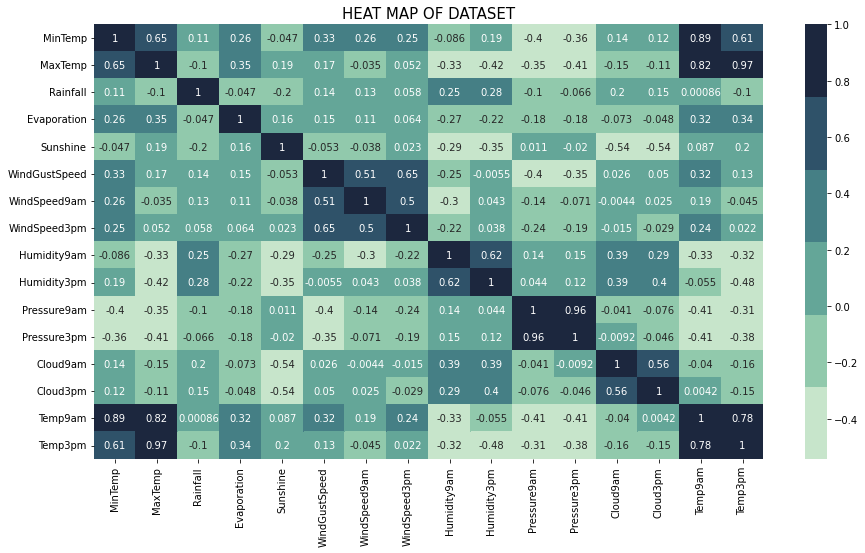

In [8]:
fig = plt.figure(figsize=[15,8])
plt.title('HEAT MAP OF DATASET',fontsize=15)    
sns.heatmap(updated_data.corr(), annot=True, cmap=sns.cubehelix_palette(rot=-.4))
plt.show()

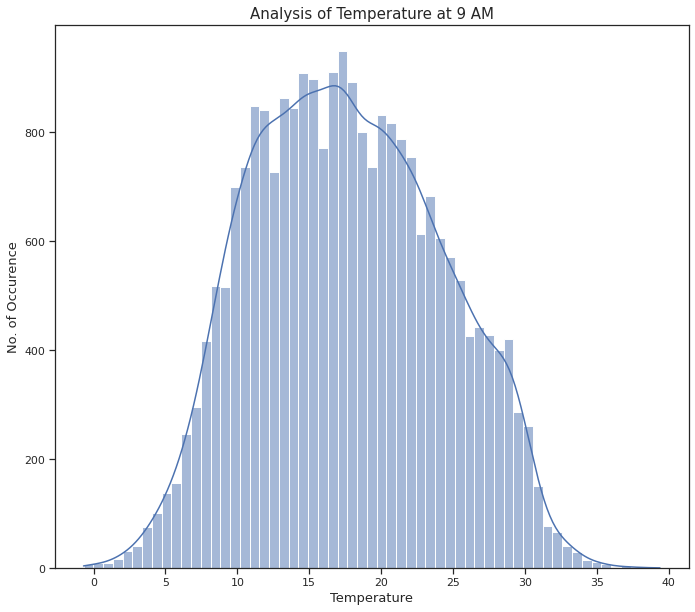

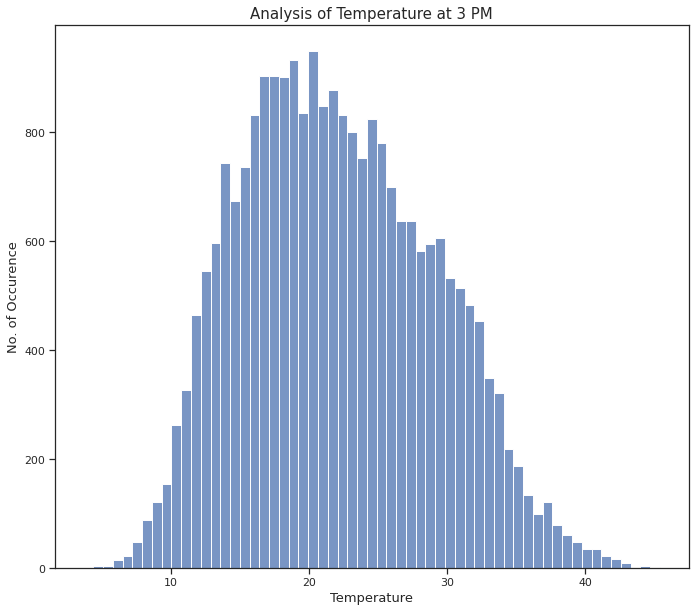

In [140]:
fig = plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
plt.title('Analysis of Temperature at 9 AM',fontsize=15)
plt.xlabel("Temperature",fontsize=13)
plt.ylabel("No. of Occurence",fontsize=13)
sns.histplot(updated_data,x='Temp9am',kde='true')
fig = plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
plt.title('Analysis of Temperature at 3 PM',fontsize=15)
plt.xlabel("Temperature",fontsize=13)
plt.ylabel("No. of Occurence",fontsize=13)
sns.histplot(updated_data,x='Temp3pm')



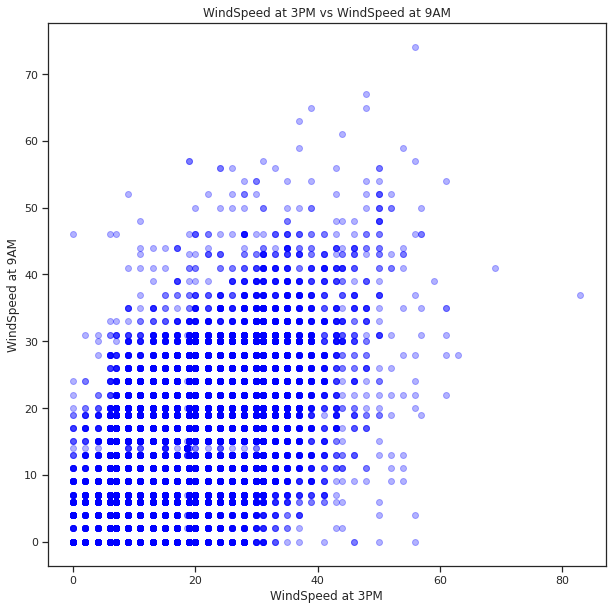

In [125]:
plt.figure(figsize=(10,10))
plt.scatter(x=updated_data.WindSpeed3pm,y=updated_data.WindSpeed9am,color='Blue',alpha=0.3)
plt.title("WindSpeed at 3PM vs WindSpeed at 9AM")
plt.xlabel("WindSpeed at 3PM",fontsize=12)
plt.ylabel("WindSpeed at 9AM",fontsize=12)
plt.show()

In [85]:
windspeed_weather_df = updated_data.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df.head()

,Location,WindSpeed9am,WindSpeed3pm
0,Albany,11.912986,19.204440
1,Albury,9.329457,14.945736
2,AliceSprings,14.960951,18.249370
3,Ballarat,20.263063,23.837838
4,Bendigo,12.854130,17.265378


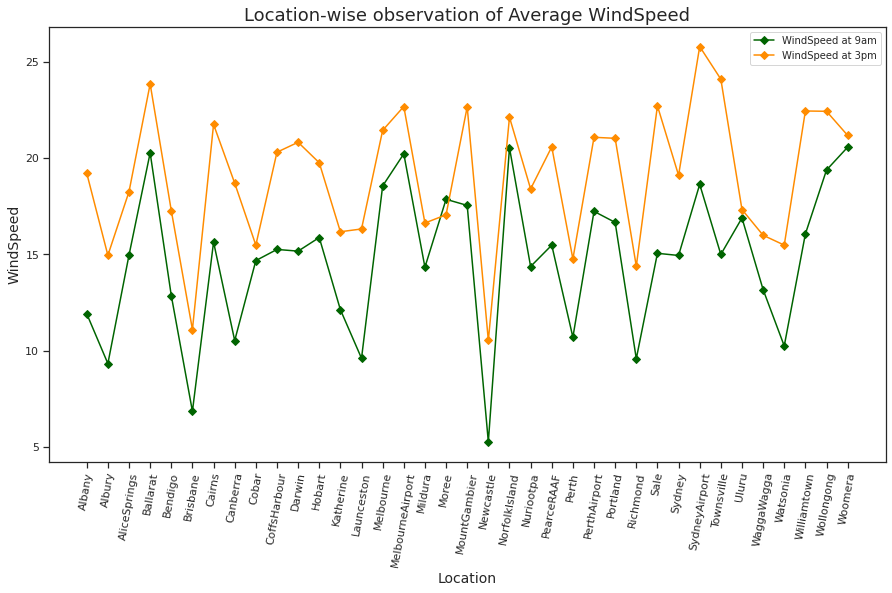

In [90]:

x = windspeed_weather_df.loc[:, 'Location']
y1 = windspeed_weather_df['WindSpeed9am'] 
y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Location-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

In [87]:
humidity_weather_df = updated_data.groupby(['Location'])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df.head()

,Location,Humidity9am,Humidity3pm
0,Albany,73.531250,67.080975
1,Albury,83.738691,64.015504
2,AliceSprings,39.337531,24.190176
3,Ballarat,88.279576,69.436036
4,Bendigo,73.543714,50.956063


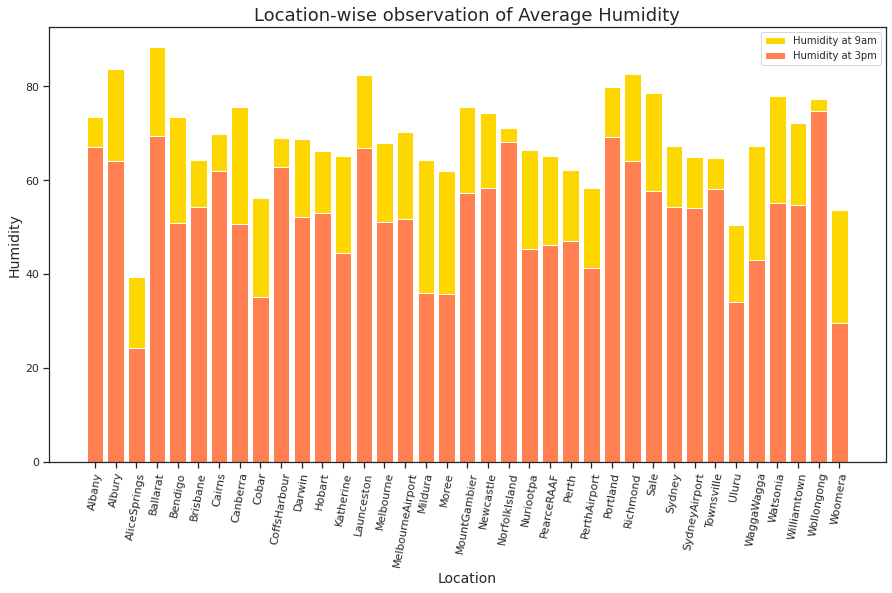

In [88]:
x = humidity_weather_df.loc[:, 'Location']
y1 = humidity_weather_df['Humidity9am'] 
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize = (15, 8))

plt.bar(x, y1, color = 'gold', label = 'Humidity at 9am') 
plt.bar(x, y2, color = 'coral',label = 'Humidity at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Location-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

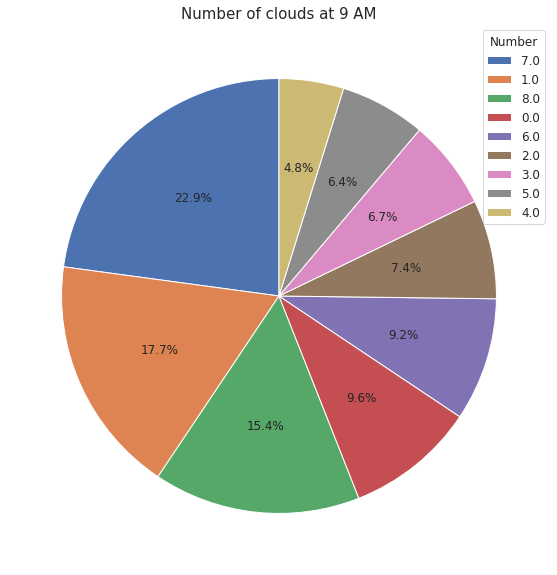

In [135]:
dic=updated_data['Cloud9am'].value_counts().to_dict()
mycolors=['#581845','#900C3F','#C70039','#FF5733','#FFC300']
plt.figure(figsize=(10,10))
plt.pie(x=dic.values(),autopct='%1.1f%%',startangle=90,wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
plt.legend(title='Number',fontsize=12,labels=dic.keys())
plt.title('Number of clouds at 9 AM',fontsize=15)
plt.show()


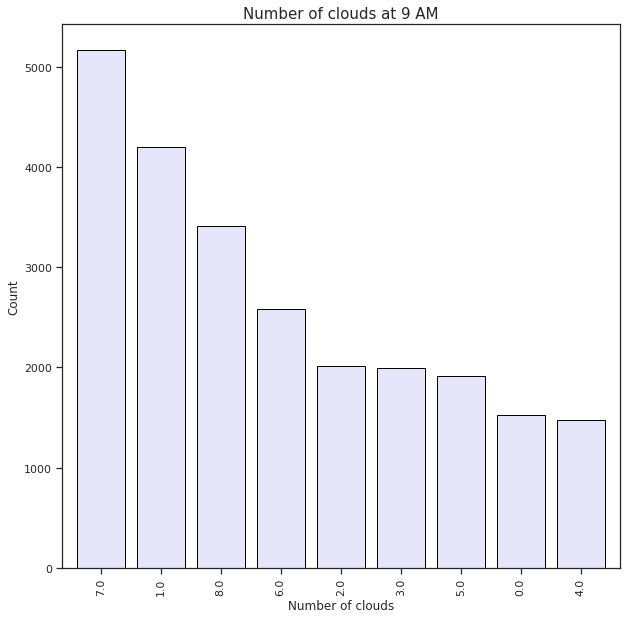

In [139]:
barpic=plt.figure(figsize=(10,10))
updated_data['Cloud3pm'].value_counts().plot(kind='bar',color='Lavender',width=0.8,edgecolor='black')
plt.title('Number of clouds at 3 PM',fontsize=15)
plt.xlabel("Number of clouds",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()